In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
sns.set_context('poster', font_scale=1.25)

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
from LB_D2Q9 import pipe as pip

In [6]:
from IPython import display

In [12]:
sim_p=pip.Pipe_Flow()
sim_p_Obst=pip.Pipe_Flow_Obstacles()

In [10]:
%%prun
sim_p.run(100)

When running this on my computer I get that the time it takes for it to run over 100 times is 38.549 seconds, which compared to other stuff is quite a significant slowdown

Now I will try modify the boundary conditions and create a new sub-class to incorporate the periodic boundary condition in Python directly

<matplotlib.colorbar.Colorbar instance at 0x10b52fcb0>

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


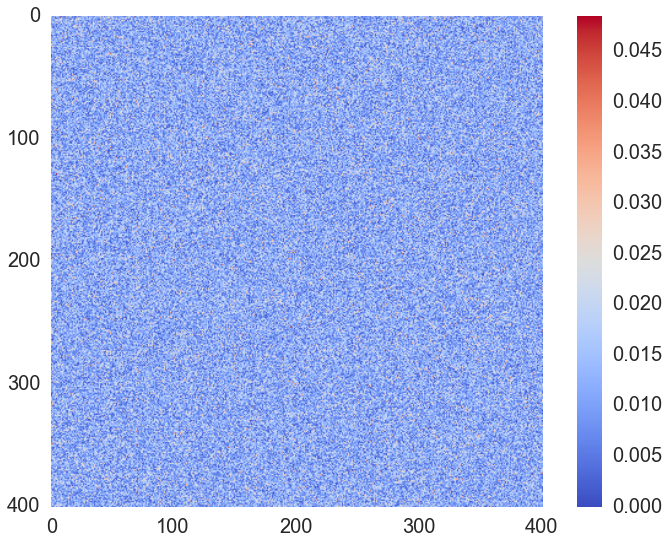

In [18]:
mag_cl = np.sqrt(sim_p.u**2 + sim_p.v**2)
plt.imshow(mag_cl.T, cmap=cm.coolwarm)
plt.grid(False)
#plt.clim(0, 1)
plt.colorbar()

In [19]:
#### Input to the simulation in SI. ######
diameter = 2. # meters
length = 4. # meters

deltaP = -.1

dr = 0.005
dt = dr**2

viscosity = 10.**-6. # More viscous = easier to simulate!

##### Derived parameters ######
print 'Desired viscosity:' , viscosity
#Re = (input_velocity * diameter)/viscosity
#print 'Desired Re', Re

# Re is set by diameter, input_velocity, and viscosity
# Adjust dr so that mach number doers not explode!
print
print '###### Simulation Parameters #########'
print

# Solve for the desired omega...make sure it's in the correct range.


ly = int(np.ceil(diameter/dr))
lx = int(np.ceil(length/dr))
print 'ly', ly
print 'lx', lx

nx = lx + 1
ny = ly + 1

omega = .5 + (3*dt*viscosity)/(dr**2)

print 'omega:' , omega

assert (omega > 0.5) and (omega < 1)

obstacle_size=.25 # meters

Desired viscosity: 1e-06

###### Simulation Parameters #########

ly 400
lx 800
omega: 0.500003


In [27]:
sim = pip.Pipe_Flow_Obstacles(deltaP = -0.1)

In [28]:
sim.run(100)

IndexError: tuple index out of range

<matplotlib.colorbar.Colorbar instance at 0x109704b90>

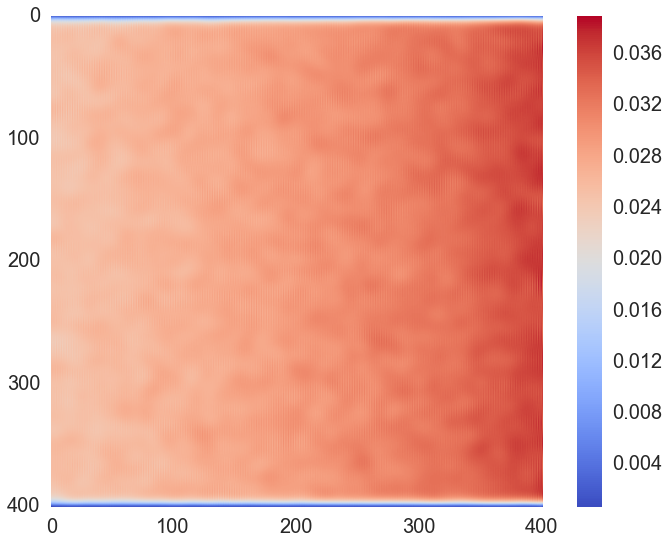

In [24]:
mag_cl = np.sqrt(sim.u**2 + sim.v**2)
plt.imshow(mag_cl.T, cmap=cm.coolwarm)
plt.grid(False)
#plt.clim(0, 1)
plt.colorbar()